In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
t = np.arange (0,10,0.001)
s = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
len(t)

10000

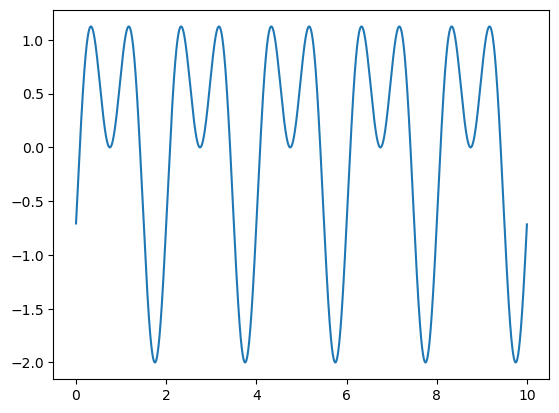

In [22]:
plt.plot(t,s)

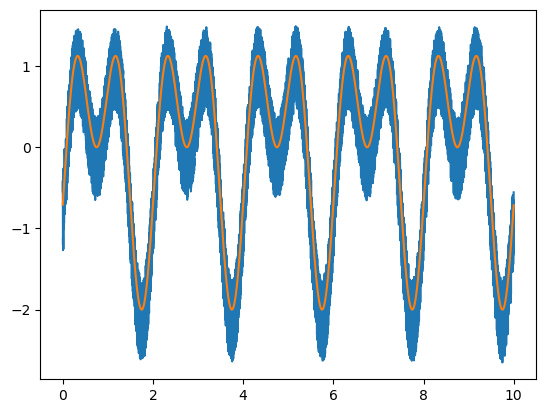

In [23]:
n = np.random.uniform(np.min(s)/3,np.max(s)/3,len(t))
sn = s+n
plt.plot(t,sn)
plt.plot(t,s)

In [24]:
fil = np.ones(100)

s_for_conv = np.ones(len(s)+len(fil)-1)
s_for_conv[len(fil)//2:len(fil)//2+len(s)] = sn


s_matrix = []
for i in range(len(s)):
    s_matrix.append(s_for_conv[i:i+len(fil)])
s_matrix = np.array(s_matrix)

c = np.linalg.lstsq(s_matrix, s)


C:\Users\Asus\AppData\Local\Temp\ipykernel_13856\3009466797.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, s)


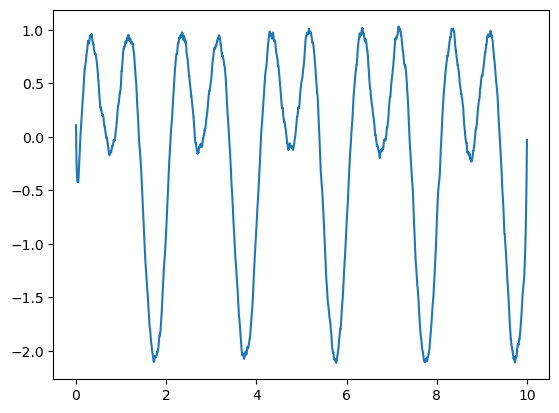

In [25]:
s_filt = s_matrix @ c[0]
plt.plot(t,s_filt)

In [60]:
def adaptive_filter (s_matrix, order, n, steps):
    filt = np.ones(order)
    error = np.zeros(s_matrix.shape)
    for j in range (steps):
        for i in range(len(s_matrix)):
            output_signal = s_matrix[i]@filt
            error[i] = s_matrix[i] - output_signal
        filt,_,_,_ = np.linalg.lstsq(error, n)

        filtered = s_matrix@filt
    return filtered
e = adaptive_filter(s_matrix, 100, s, 5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13856\2948918474.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  filt,_,_,_ = np.linalg.lstsq(error, n)


C:\Users\Asus\AppData\Local\Temp\ipykernel_13856\2948918474.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  filt,_,_,_ = np.linalg.lstsq(error, n)


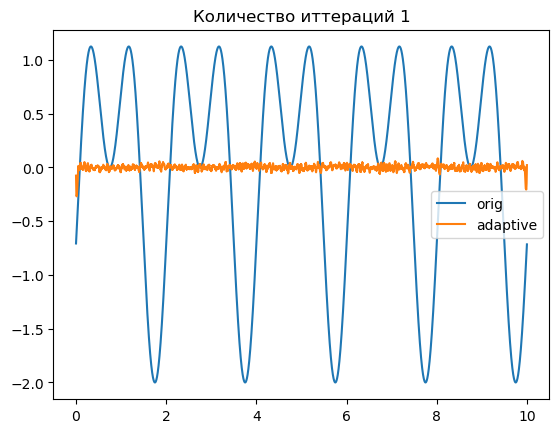

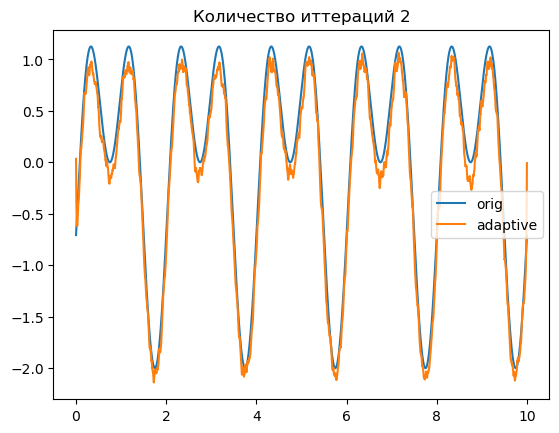

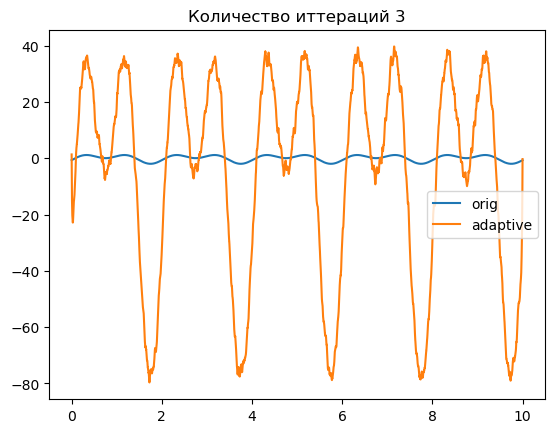

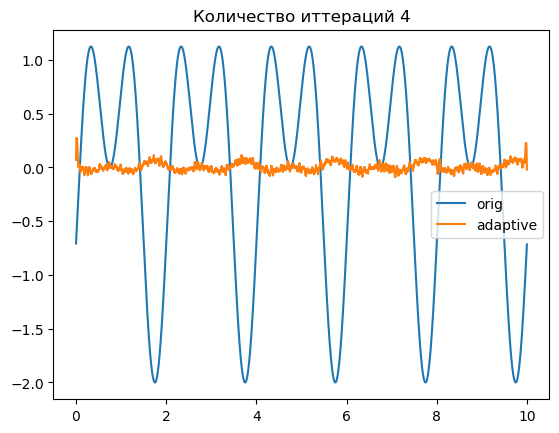

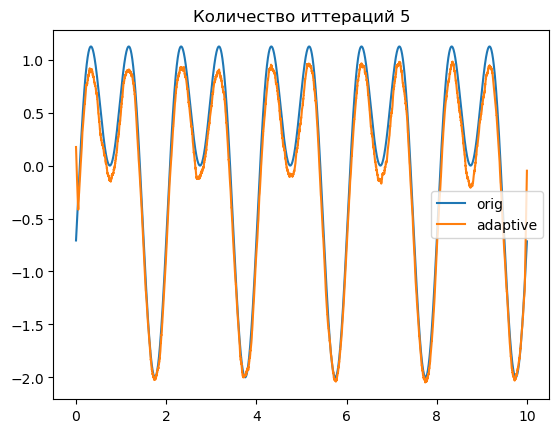

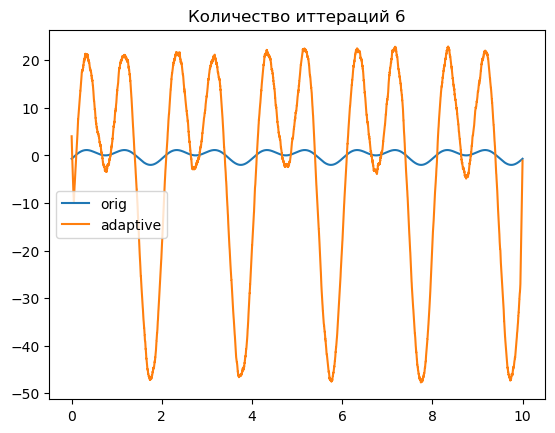

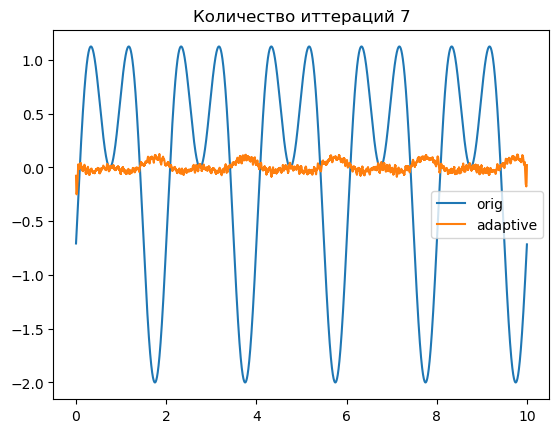

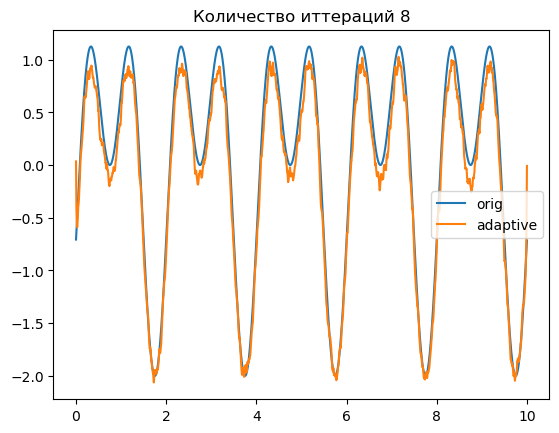

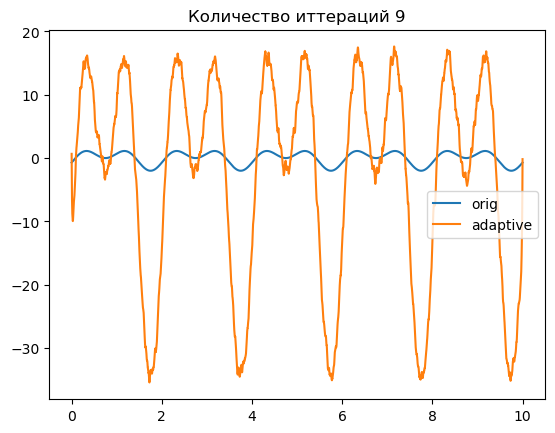

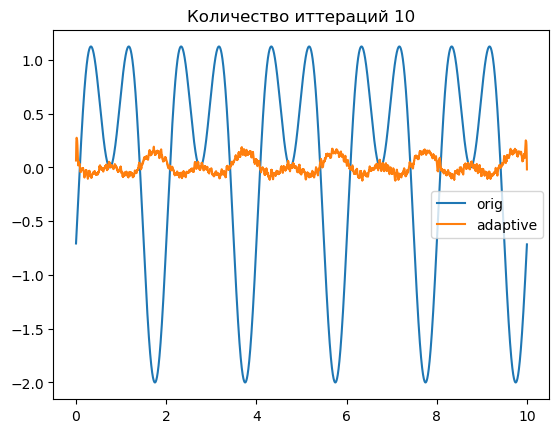

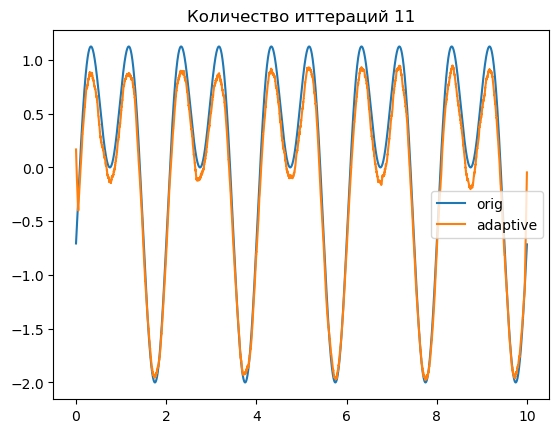

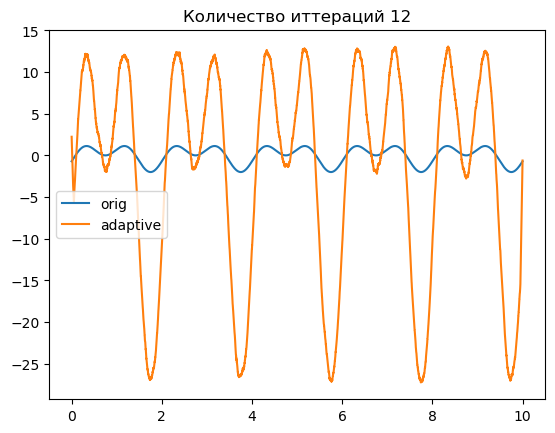

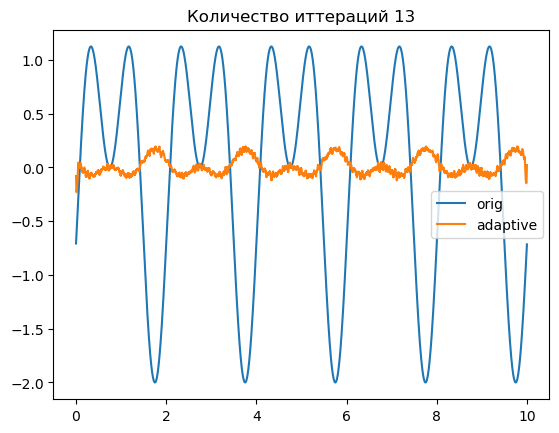

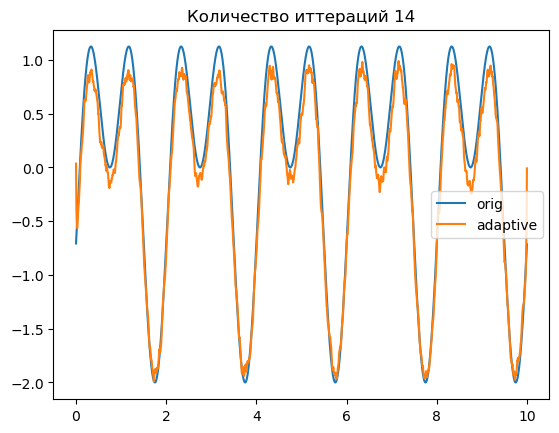

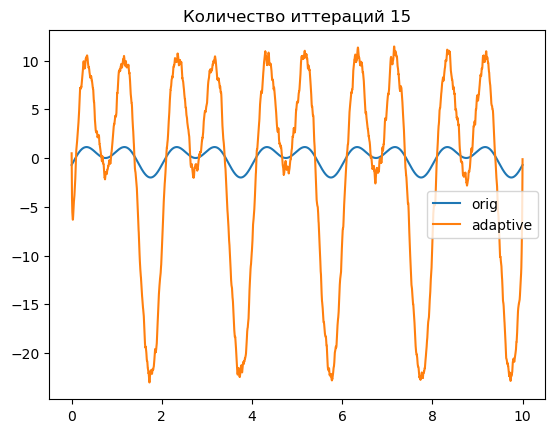

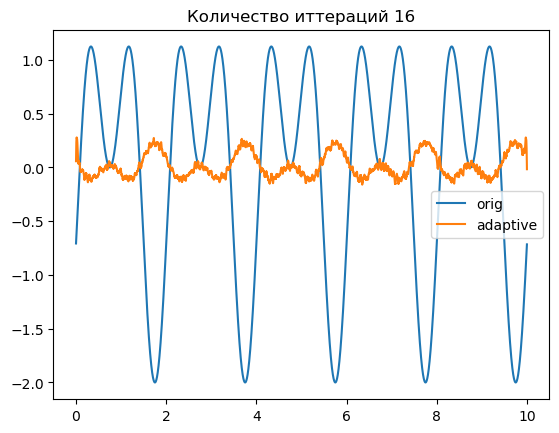

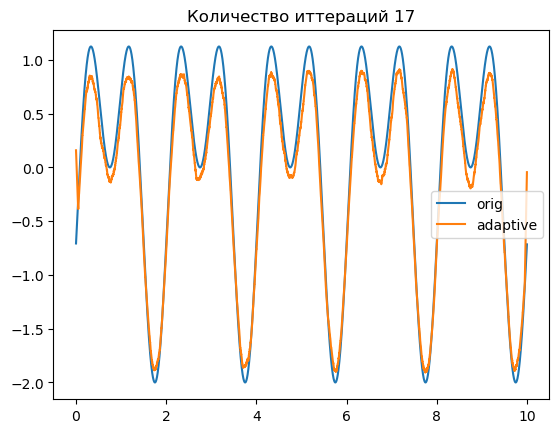

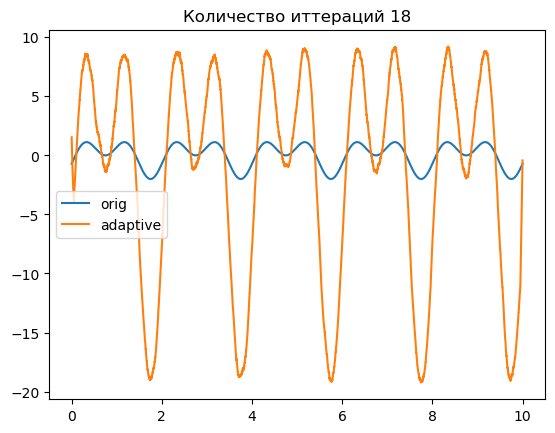

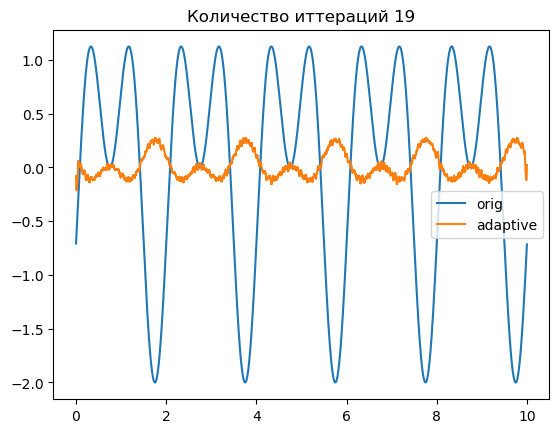

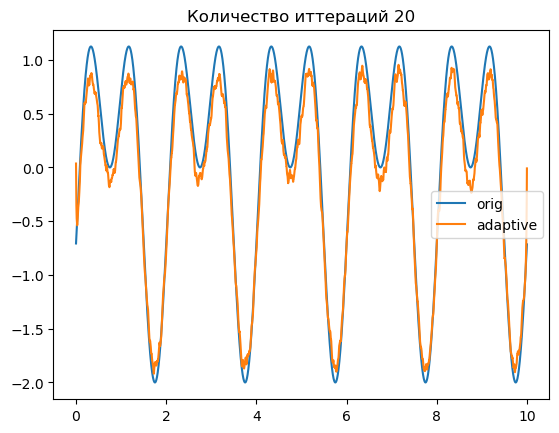

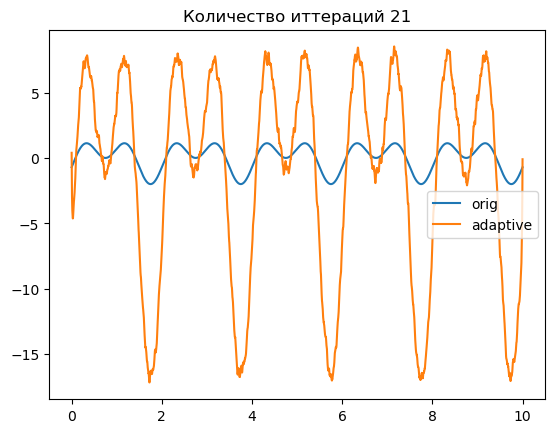

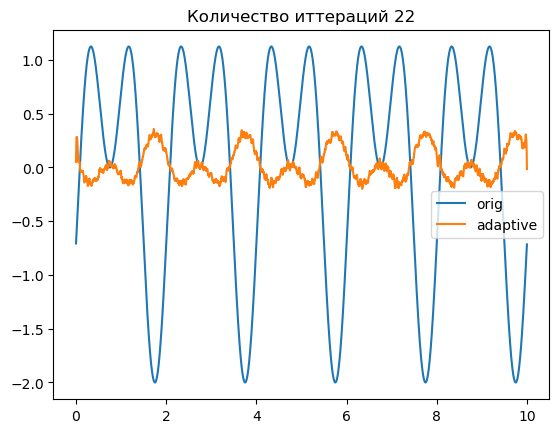

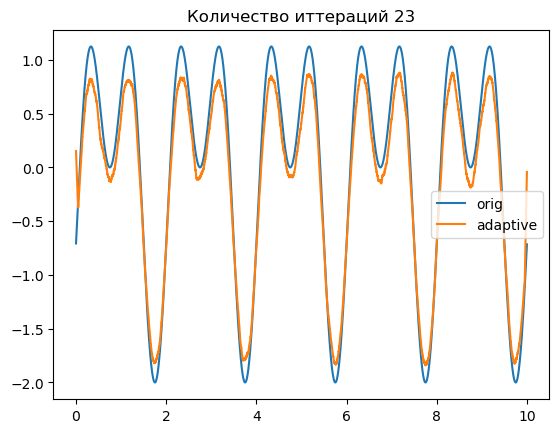

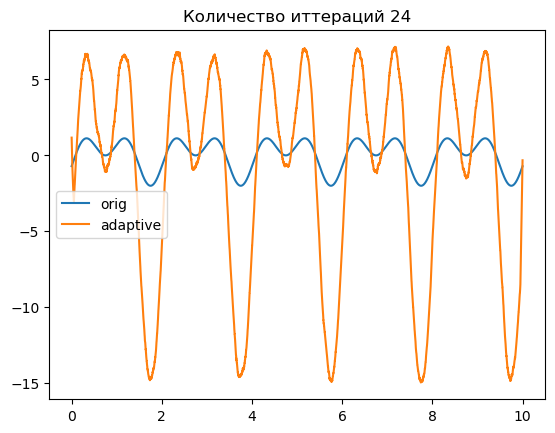

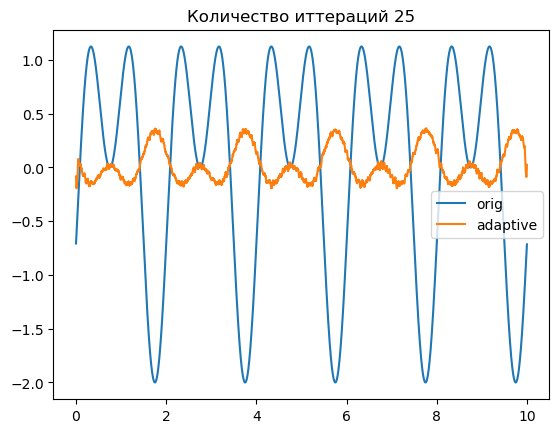

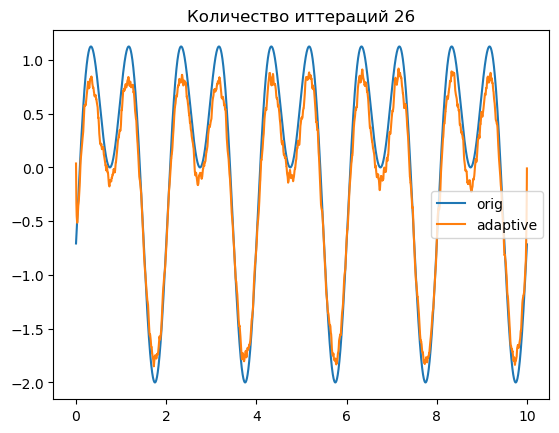

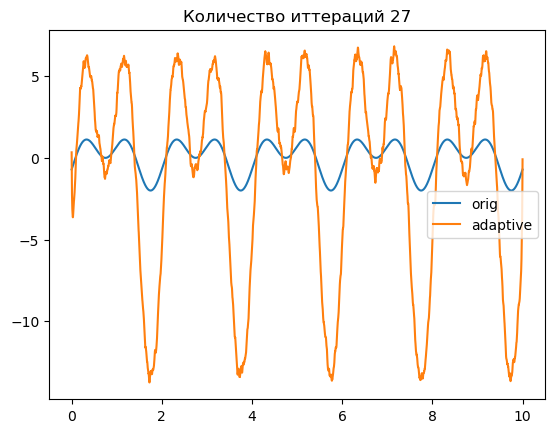

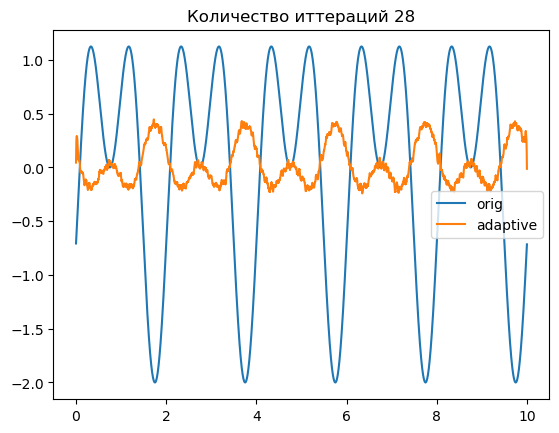

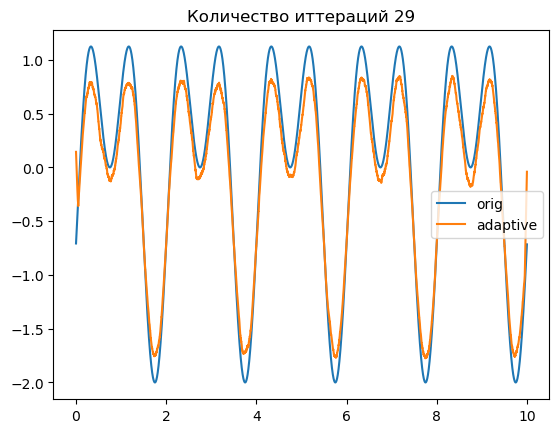

In [68]:
for i in range (1,30):
    e = adaptive_filter(s_matrix, 100, s, i)
    plt.title(f'Количество иттераций {i}')
    plt.plot(t,s, label= 'orig')
    plt.plot(t,e, label = 'adaptive')
    plt.legend()
    plt.show()

In [ ]:
len(s_matrix)